In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

In [3]:
health = pd.read_csv("Updated_Subset_1.csv")

In [3]:
health.shape

(61440, 25)

In [4]:
health.head()

,sub_id,acc_chest_x,acc_chest_y,acc_chest_z,ekg_1,ekg_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,...,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
0,1,-10.3950,1.07170,0.61225,-0.037677,-0.163270,4.3791,-10.2060,0.148050,0.59184,...,-7.0015,-10.0890,3.0789,-0.57647,-0.59959,0.75431,-7.4624,7.7953,-44.6320,0
1,1,-9.3824,1.44510,0.65637,0.096285,-0.092098,5.4713,-9.5863,-0.216270,0.62338,...,-6.3209,-10.0260,2.3737,-0.57647,-0.59959,0.75431,-9.1035,-12.6890,-25.6870,0
2,1,-8.3859,1.11310,0.51070,0.188380,0.025118,4.1823,-9.5796,-0.530910,0.62338,...,-4.5576,-10.1840,1.6471,-0.56667,-0.65298,0.72629,-9.1449,-16.8230,-3.6248,0
3,1,-7.2940,0.56039,1.31360,0.305600,0.196760,1.4208,-9.3857,0.044924,0.62338,...,-3.2267,-9.5227,1.7322,-0.56667,-0.65298,0.72629,-7.4641,-10.3220,12.9500,0
4,1,-7.0546,0.20357,1.88150,0.234430,0.192570,3.1137,-9.6868,-0.359450,0.64007,...,-2.6922,-8.1222,1.7814,-0.56667,-0.65298,0.72629,-4.3460,-3.7223,22.6940,0


In [5]:
health.tail()

,sub_id,acc_chest_x,acc_chest_y,acc_chest_z,ekg_1,ekg_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,...,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
61435,10,-21.938,2.9371,-8.5778,1.31870,1.05490,10.1350,-19.17300,3.5073,0.63080,...,-11.261,-0.023032,1.6968,-0.8098,-0.12320,0.77586,-60.719,14.234,74.095,1
61436,10,-14.692,4.2891,-3.1929,-1.13870,-0.87912,13.3180,-14.76500,1.7491,0.63080,...,-21.363,-2.567000,2.2987,-0.8098,-0.12320,0.77586,-58.902,16.395,56.059,1
61437,10,-16.366,2.6316,-4.7737,-0.48142,-0.43956,11.3860,-4.71080,-1.7779,0.50093,...,-21.298,-7.233100,1.6904,-0.8098,-0.12320,0.77586,-56.552,-17.843,64.751,1
61438,10,-16.694,1.8618,-11.9690,-0.47724,-0.45631,8.5897,-0.97313,-4.2440,0.50093,...,-21.065,-14.709000,-3.9334,-0.8098,-0.12320,0.77586,-63.295,-117.700,163.090,1
61439,10,-13.362,-2.5943,-5.4440,-0.46468,-0.55259,4.0575,-1.91420,-3.3051,0.50093,...,-20.981,-14.156000,-6.5724,-0.7902,-0.16016,0.80819,-55.105,-34.688,287.330,1


In [6]:
health

,sub_id,acc_chest_x,acc_chest_y,acc_chest_z,ekg_1,ekg_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,...,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
0,1,-10.3950,1.07170,0.61225,-0.037677,-0.163270,4.3791,-10.20600,0.148050,0.59184,...,-7.0015,-10.089000,3.0789,-0.57647,-0.59959,0.75431,-7.4624,7.7953,-44.6320,0
1,1,-9.3824,1.44510,0.65637,0.096285,-0.092098,5.4713,-9.58630,-0.216270,0.62338,...,-6.3209,-10.026000,2.3737,-0.57647,-0.59959,0.75431,-9.1035,-12.6890,-25.6870,0
2,1,-8.3859,1.11310,0.51070,0.188380,0.025118,4.1823,-9.57960,-0.530910,0.62338,...,-4.5576,-10.184000,1.6471,-0.56667,-0.65298,0.72629,-9.1449,-16.8230,-3.6248,0
3,1,-7.2940,0.56039,1.31360,0.305600,0.196760,1.4208,-9.38570,0.044924,0.62338,...,-3.2267,-9.522700,1.7322,-0.56667,-0.65298,0.72629,-7.4641,-10.3220,12.9500,0
4,1,-7.0546,0.20357,1.88150,0.234430,0.192570,3.1137,-9.68680,-0.359450,0.64007,...,-2.6922,-8.122200,1.7814,-0.56667,-0.65298,0.72629,-4.3460,-3.7223,22.6940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,10,-21.9380,2.93710,-8.57780,1.318700,1.054900,10.1350,-19.17300,3.507300,0.63080,...,-11.2610,-0.023032,1.6968,-0.80980,-0.12320,0.77586,-60.7190,14.2340,74.0950,1
61436,10,-14.6920,4.28910,-3.19290,-1.138700,-0.879120,13.3180,-14.76500,1.749100,0.63080,...,-21.3630,-2.567000,2.2987,-0.80980,-0.12320,0.77586,-58.9020,16.3950,56.0590,1
61437,10,-16.3660,2.63160,-4.77370,-0.481420,-0.439560,11.3860,-4.71080,-1.777900,0.50093,...,-21.2980,-7.233100,1.6904,-0.80980,-0.12320,0.77586,-56.5520,-17.8430,64.7510,1
61438,10,-16.6940,1.86180,-11.96900,-0.477240,-0.456310,8.5897,-0.97313,-4.244000,0.50093,...,-21.0650,-14.709000,-3.9334,-0.80980,-0.12320,0.77586,-63.2950,-117.7000,163.0900,1


In [7]:
health.columns

Index(['sub_id', 'acc_chest_x', 'acc_chest_y', 'acc_chest_z', 'ekg_1', 'ekg_2',
       'acc_ankle_x', 'acc_ankle_y', 'acc_ankle_z', 'gyro_ankle_x',
       'gyro_ankle_y', 'gyro_ankle_z', 'mag_ankle_x', 'mag_ankle_y',
       'mag_ankle_z', 'acc_arm_x', 'acc_arm_y', 'acc_arm_z', 'gyro_arm_x',
       'gyro_arm_y', 'gyro_arm_z', 'mag_arm_x', 'mag_arm_y', 'mag_arm_z',
       'label'],
      dtype='object')

In [8]:
health.dtypes

sub_id            int64
acc_chest_x     float64
acc_chest_y     float64
acc_chest_z     float64
ekg_1           float64
ekg_2           float64
acc_ankle_x     float64
acc_ankle_y     float64
acc_ankle_z     float64
gyro_ankle_x    float64
gyro_ankle_y    float64
gyro_ankle_z    float64
mag_ankle_x     float64
mag_ankle_y     float64
mag_ankle_z     float64
acc_arm_x       float64
acc_arm_y       float64
acc_arm_z       float64
gyro_arm_x      float64
gyro_arm_y      float64
gyro_arm_z      float64
mag_arm_x       float64
mag_arm_y       float64
mag_arm_z       float64
label             int64
dtype: object

In [9]:
pd.set_option("display.max_columns", 100) 

In [10]:
health.describe(include='all')  

,sub_id,acc_chest_x,acc_chest_y,acc_chest_z,ekg_1,ekg_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,gyro_ankle_y,gyro_ankle_z,mag_ankle_x,mag_ankle_y,mag_ankle_z,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
count,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000,61440.000000
mean,5.500000,-8.540171,-0.339105,-1.450175,-0.085238,-0.111450,2.831341,-11.859035,-2.481849,0.282853,-0.654518,-0.118604,0.219078,-6.531322,0.851327,-5.120364,-7.103617,0.386549,-0.368412,-0.370497,0.598526,-2.469927,7.150913,1.249642,0.500000
std,2.872305,7.431926,3.701461,3.802768,1.271242,1.418073,7.061731,7.092127,9.419871,0.319613,0.245674,0.567108,145.016568,86.380822,37.195688,8.421735,8.801569,5.133351,0.364565,0.463855,0.529347,55.243927,46.746982,158.789151,0.500004
min,1.000000,-22.438000,-20.188000,-18.392000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-1.003700,-1.157600,-1.165000,-357.560000,-364.570000,-282.390000,-22.015000,-18.972000,-18.238000,-1.111800,-1.141700,-0.924570,-319.030000,-354.420000,-702.570000,0.000000
25%,3.000000,-12.272000,-1.904225,-2.712725,-0.313970,-0.230250,0.151173,-19.065000,-7.579775,0.129870,-0.831140,-0.609040,-84.467250,-37.610750,-9.526325,-7.864425,-12.152000,-1.115125,-0.625490,-0.704310,0.519400,-22.689000,-14.410250,-67.471250,0.000000
50%,5.500000,-8.808950,-0.680270,-0.881375,-0.104660,-0.062794,2.345150,-11.821000,-0.870335,0.385900,-0.714820,-0.110020,-31.873000,-7.356700,0.399840,-3.066650,-8.879700,0.864520,-0.405880,-0.470230,0.821120,-0.497780,2.488600,-4.374050,0.500000
75%,8.000000,-4.345000,0.985703,0.565207,0.175820,0.171640,5.656550,-8.886775,1.825975,0.504640,-0.534710,0.396860,94.530500,32.177500,13.687000,-1.303475,-6.164750,2.581675,-0.166670,-0.006160,0.961210,19.815500,28.105250,68.886500,1.000000
max,10.000000,12.996000,20.927000,24.991000,8.506500,8.519100,20.024000,21.161000,25.015000,0.922080,0.611630,0.886050,339.220000,336.240000,272.560000,19.787000,21.865000,24.639000,0.917650,1.121100,1.185300,239.690000,331.910000,657.180000,1.000000


In [11]:
print(health.loc[0:6145, 'ekg_1'])

0      -0.037677
1       0.096285
2       0.188380
3       0.305600
4       0.234430
          ...   
6141    0.933540
6142    0.920980
6143    0.870750
6144   -0.205130
6145   -0.113030
Name: ekg_1, Length: 6146, dtype: float64


In [12]:
print(health.isnull().sum())

sub_id          0
acc_chest_x     0
acc_chest_y     0
acc_chest_z     0
ekg_1           0
ekg_2           0
acc_ankle_x     0
acc_ankle_y     0
acc_ankle_z     0
gyro_ankle_x    0
gyro_ankle_y    0
gyro_ankle_z    0
mag_ankle_x     0
mag_ankle_y     0
mag_ankle_z     0
acc_arm_x       0
acc_arm_y       0
acc_arm_z       0
gyro_arm_x      0
gyro_arm_y      0
gyro_arm_z      0
mag_arm_x       0
mag_arm_y       0
mag_arm_z       0
label           0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

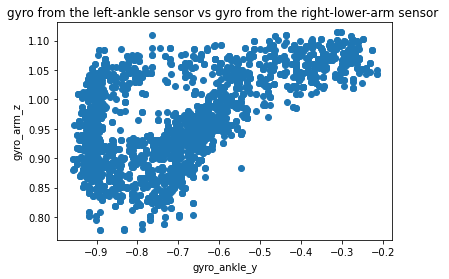

In [26]:
# Scatter plot of patient 7 walking 
x = health.loc[36866:39937, "gyro_ankle_y"] 
y = health.loc[36866:39937, "gyro_arm_z"]

plt.title('gyro from the left-ankle sensor vs gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_ankle_y')
plt.ylabel('gyro_arm_z')

plt.scatter(x, y)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

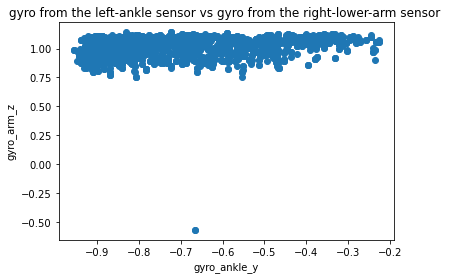

In [27]:
# Scatter plot of patient 7 running 
x = health.loc[39938:43009, "gyro_ankle_y"] 
y = health.loc[39938:43009, "gyro_arm_z"]

plt.title('gyro from the left-ankle sensor vs gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_ankle_y')
plt.ylabel('gyro_arm_z')

plt.scatter(x, y)

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

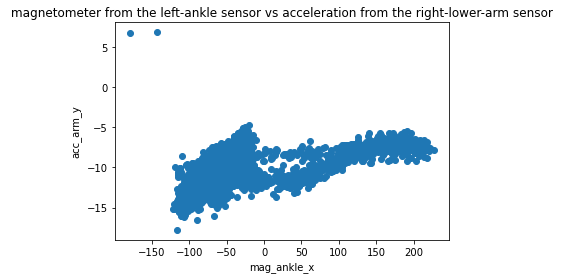

In [93]:
# Scatter plot of patient 4 walking
x = health.loc[18434:21505, "mag_ankle_x"] 
y = health.loc[18434:21505, "acc_arm_y"]

plt.title(' magnetometer from the left-ankle sensor vs acceleration from the right-lower-arm sensor ')
plt.xlabel('mag_ankle_x')
plt.ylabel('acc_arm_y')

plt.scatter(x, y)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

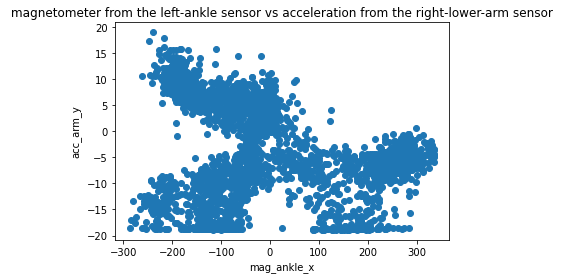

In [12]:
# Scatter plot of patient 4 running 
x = health.loc[21506:24577, "mag_ankle_x"] 
y = health.loc[21506:24577, "acc_arm_y"]

plt.title(' magnetometer from the left-ankle sensor vs acceleration from the right-lower-arm sensor ')
plt.xlabel('mag_ankle_x')
plt.ylabel('acc_arm_y')

plt.scatter(x, y)

plt.show

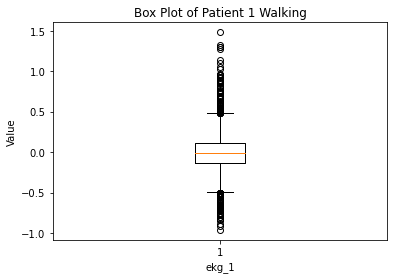

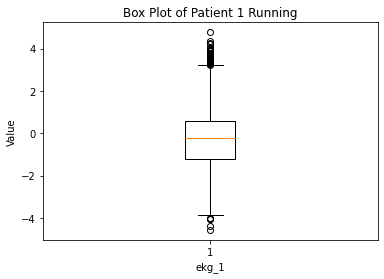

In [43]:
# Box plot of patient 1 walking
sample = health.loc[0:3073, "ekg_1"] 

plt.boxplot(sample.values)

plt.title('Box Plot of Patient 1 Walking')
plt.xlabel('ekg_1')
plt.ylabel('Value')

plt.show()



# Box plot of patient 1 running
sample = health.loc[3074:6145, "ekg_1"]

plt.boxplot(sample.values)

plt.title('Box Plot of Patient 1 Running')
plt.xlabel('ekg_1')
plt.ylabel('Value')

plt.show()

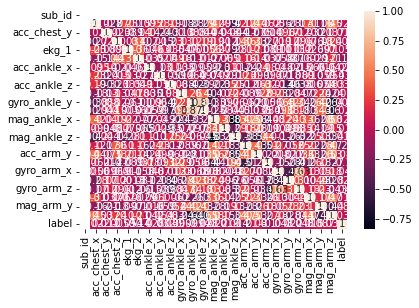

In [17]:
sample1 = health.iloc[0:3073]
corrMatrix = sample1.corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

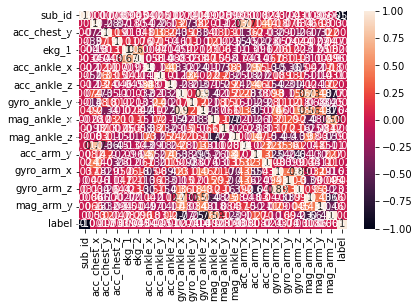

In [18]:
sample1 = health.iloc[3074:6145]
corrMatrix = sample1.corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

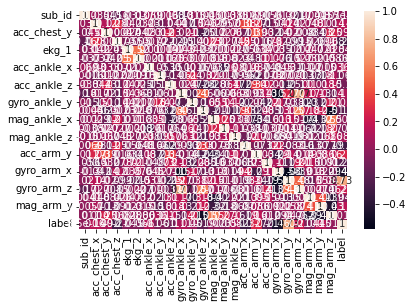

In [19]:
corrMatrix = health.corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

In [20]:
corr_matrix = health.corr()

print(corr_matrix)

                    sub_id  acc_chest_x  acc_chest_y  acc_chest_z     ekg_1  \
sub_id        1.000000e+00     0.034843    -0.044927    -0.163763 -0.031273   
acc_chest_x   3.484350e-02     1.000000     0.124304     0.280983  0.042324   
acc_chest_y  -4.492744e-02     0.124304     1.000000    -0.000465  0.024261   
acc_chest_z  -1.637629e-01     0.280983    -0.000465     1.000000 -0.055144   
ekg_1        -3.127308e-02     0.042324     0.024261    -0.055144  1.000000   
ekg_2        -3.665164e-02    -0.031670    -0.041845    -0.049550  0.521418   
acc_ankle_x   6.925095e-02     0.029862     0.032752    -0.007151  0.010189   
acc_ankle_y  -1.639065e-03    -0.107159     0.011634    -0.021877 -0.001923   
acc_ankle_z   3.817317e-02    -0.043857     0.230272    -0.119453  0.047413   
gyro_ankle_x -1.803296e-01     0.016649    -0.020747    -0.154686  0.043098   
gyro_ankle_y  1.461048e-02    -0.149642     0.104603    -0.143105  0.042241   
gyro_ankle_z -4.469911e-03     0.046157    -0.247667

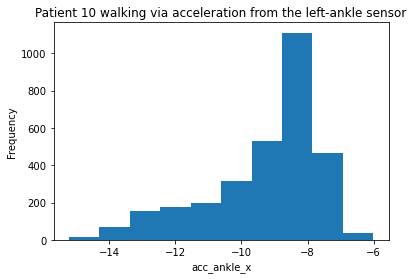

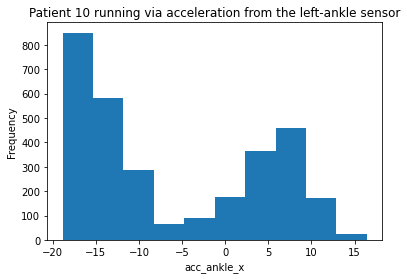

In [54]:
health.loc[55298:58369, 'acc_arm_y'].plot.hist(bins=10)
plt.title('Patient 10 walking via acceleration from the left-ankle sensor')
plt.xlabel('acc_ankle_x')
plt.show()

health.loc[58370:61441, 'acc_arm_y'].plot.hist(bins=10)
plt.title('Patient 10 running via acceleration from the left-ankle sensor')
plt.xlabel('acc_ankle_x')
plt.show()

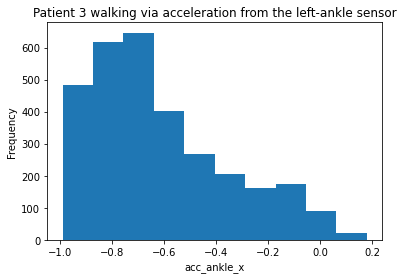

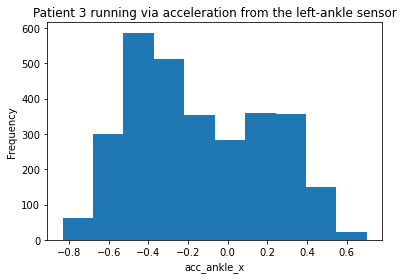

In [55]:
health.loc[12290:15361, 'gyro_arm_y'].plot.hist(bins=10)
plt.title('Patient 3 walking via acceleration from the left-ankle sensor')
plt.xlabel('acc_ankle_x')
plt.show()

health.loc[15362:18345, 'gyro_arm_y'].plot.hist(bins=10)
plt.title('Patient 3 running via acceleration from the left-ankle sensor')
plt.xlabel('acc_ankle_x')
plt.show()

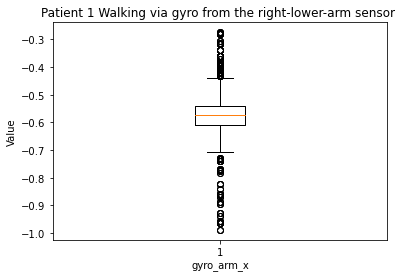

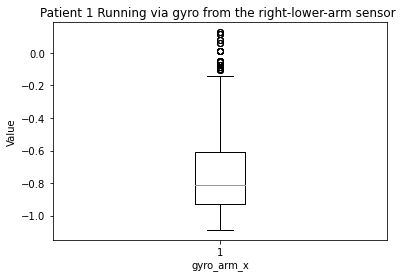

In [23]:
sample = health.loc[0:3073, "gyro_arm_x"] 

plt.boxplot(sample.values)

plt.title('Patient 1 Walking via gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_arm_x')
plt.ylabel('Value')

plt.show()


sample = health.loc[3073:6145, "gyro_arm_x"] 

plt.boxplot(sample.values)

plt.title('Patient 1 Running via gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_arm_x')
plt.ylabel('Value')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

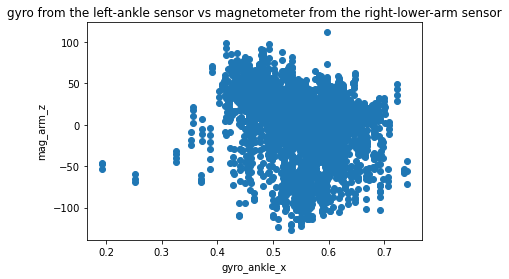

In [60]:
x = health.loc[0:3073, "gyro_ankle_x"]
y = health.loc[0:3073, "mag_arm_z"]
plt.title('gyro from the left-ankle sensor vs magnetometer from the right-lower-arm sensor')
plt.xlabel('gyro_ankle_x')
plt.ylabel('mag_arm_z')

plt.scatter(x, y)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

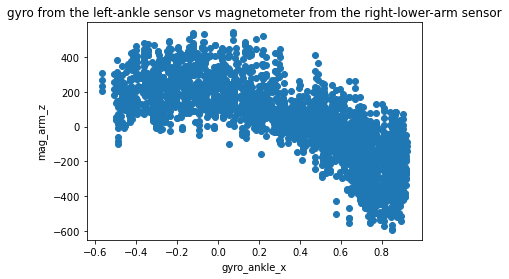

In [61]:
x = health.loc[3074:6145, "gyro_ankle_x"]
y = health.loc[3074:6145, "mag_arm_z"]
plt.title('gyro from the left-ankle sensor vs magnetometer from the right-lower-arm sensor')
plt.xlabel('gyro_ankle_x')
plt.ylabel('mag_arm_z')

plt.scatter(x, y)

plt.show
# There is a negative linear relationship between the two. 

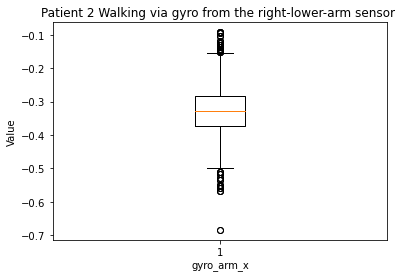

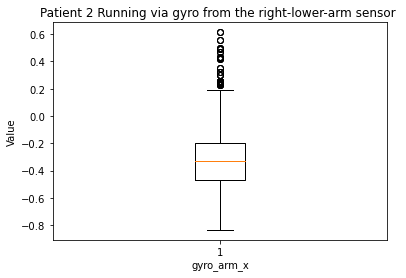

In [56]:
sample = health.loc[6146:9217, "gyro_arm_x"] 

plt.boxplot(sample.values)

plt.title('Patient 2 Walking via gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_arm_x')
plt.ylabel('Value')

plt.show()


sample = health.loc[9218:12289, "gyro_arm_x"] 

plt.boxplot(sample.values)

plt.title('Patient 2 Running via gyro from the right-lower-arm sensor ')
plt.xlabel('gyro_arm_x')
plt.ylabel('Value')

plt.show()

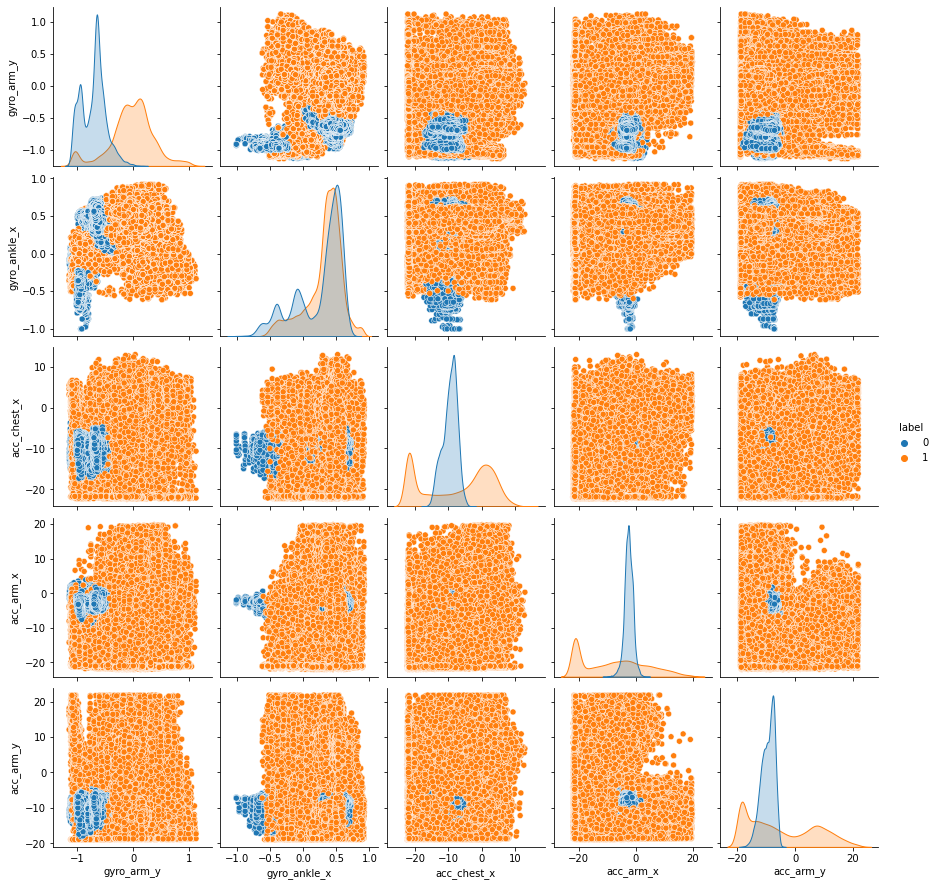

In [5]:
sn.pairplot(health, vars=['gyro_arm_y', 'gyro_ankle_x', 'acc_chest_x', 'acc_arm_x', 'acc_arm_y'], hue='label')
plt.show()

#### The pairplot feature is used to plot multiple pairwise bivariate distributions in a dataset. Five variables were used. The bar graph shows the distribution of each variable. The scatter plot shows the relationship between pairs of variables, in a matrix form. It show the distribution between walking and running. 


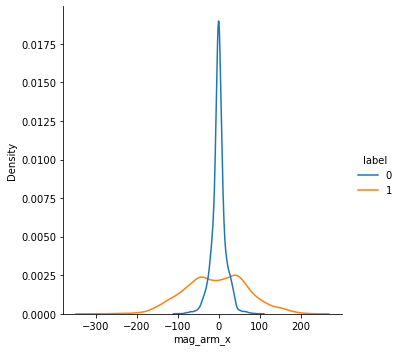

In [34]:
sn.displot(health, x="mag_arm_x", hue="label", kind="kde")

#### Displot used to see the variation distribution of data variables, in this case, the magnetometer from the right-lower-arm sensor is the variable used. We have two separate density estimates that will be computed for each level of the label variable, 0 for walking and 1 for running. Walking is proven to have a much higher density.

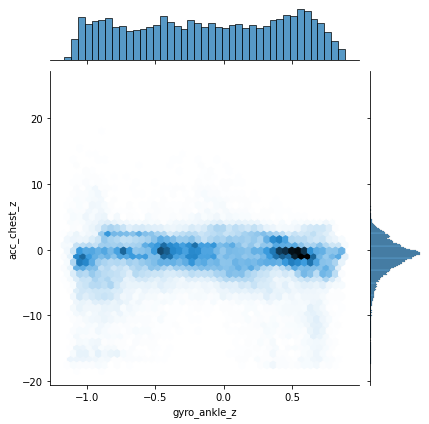

In [38]:
sn.jointplot(x='gyro_ankle_z', y='acc_chest_z', data=health, kind='hex')

#### Jointplot is used to study the numerical relationship between two different variables,  gyro from the left-ankle sensor and acceleration from the chest sensor. Where the histogram is the highest, the hexagon is the darkest shade so there is a highest concentration of points in that area. 